## Final Project Submission

Please fill out:
* Student name: Benedict Wafula Kuloba
* Student pace: Full time - Remote
* Scheduled project review date/time: 22/03/2024
* Instructor name: Asha Deen


# Business Understanding

Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

The primary objective of this project is to support Microsoft's entry into the film industry by offering crucial insights into the fundamental drivers behind a movie's success. Through an extensive analysis of diverse films, the aim is to identify distinct patterns that lay foundation for successful movies.



By leveraging information from these datasets, this analysis aimed to address key questions posed in the business problem, with a focus on target variables such as genres, runtime, domestic gross, and production budget.

Research Questions;

1. what are the most popular movie genres?
2. what is the average runtime minutes of a movie?
3. what is the average domestic gross for a standar movie?
4. what is the relationship between domestic gross profit and production budget?


#Data Cleaning

In this workbook we:
1.	Load the data into pandas DataFrames
2.	Inspect and observe the DataFrames
3.	Clean and convert the data into appropriate types


Initial Reading of Data Files

In [259]:
#importing the necessary modules to carry out the project

import pandas as pd
import csv
import seaborn
import matplotlib as plt
import sqlite3
conn = sqlite3.connect(r"C:\Users\bened\Documents\Moringa\Data-Science-_Content-Analysis\Data\im.db\im.db")
cur=conn.cursor()

International Movie Database (IMDB)

Data Assesment of data contained in the movie basics table in the imdb database using SQLite3.

In [312]:
# connecting to the database
Q_movies=pd.read_sql("""
SELECT *
  FROM movie_basics
  JOIN movie_ratings 
  USING (movie_id) ;
""",conn)

In [313]:
tmdbmovies_budget=pd.read_csv(r"C:\Users\bened\Documents\Moringa\Data-Science-_Content-Analysis\Data\tmdb.movies.csv\tmdb.movies.csv")

In [314]:
tnmovies_budget=pd.read_csv(r"C:\Users\bened\Documents\Moringa\Data-Science-_Content-Analysis\Data\tn.movie_budgets.csv\tn.movie_budgets.csv")


In [315]:
rtmovie_info=pd.read_csv(r"C:\Users\bened\Documents\Moringa\Data-Science-_Content-Analysis\Data\rt.movie_info.tsv\rt.movie_info.tsv", sep='\t')


In [316]:
rtreview_tsv=pd.read_csv(r"C:\Users\bened\Documents\Moringa\Data-Science-_Content-Analysis\Data\rt.reviews.tsv\rt.reviews.tsv", sep='\t', encoding='latin1')

In [317]:
bom_movies=pd.read_csv(r"C:\Users\bened\Documents\Moringa\Data-Science-_Content-Analysis\Data\bom.movie_gross.csv\bom.movie_gross.csv")


Data Interpretation 
#assesing information about the dataframe

In [266]:
Q_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


I could see I had some missing values in the original_title column, the start_year column, runtime_minutes and genres column. 

In [267]:
tmdbmovies_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


No mssing values detected

In [268]:
tnmovies_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [269]:
rtmovie_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [270]:
rtreview_tsv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [271]:
bom_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


# Data Cleaning 

cleaning up some of the data so that it can be used properly in futurue visualizations

In [272]:
#drop duplicated titles 
Q_movies.drop(columns=['original_title'], inplace=True)
#fill runtime_minutes from NAN to mean
Q_movies['runtime_minutes'].fillna(Q_movies['runtime_minutes'].mean(), inplace=True)
# Fill missing genres with 'Unknown'
Q_movies['genres'].fillna('Unknown', inplace=True)
Q_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   start_year       73856 non-null  int64  
 3   runtime_minutes  73856 non-null  float64
 4   genres           73856 non-null  object 
 5   averagerating    73856 non-null  float64
 6   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 3.9+ MB


In [273]:
import locale
locale.setlocale(locale.LC_ALL, '')

# Convert string representations of currency values to floats
tnmovies_budget['domestic_gross'] = tnmovies_budget['domestic_gross'].apply(lambda x: locale.atof(str(x).strip('$')))
tnmovies_budget['production_budget'] = tnmovies_budget['production_budget'].apply(lambda x: locale.atof(str(x).strip('$')))
tnmovies_budget['worldwide_gross'] = tnmovies_budget['worldwide_gross'].apply(lambda x: locale.atof(str(x).strip('$')))

In [274]:
#conveting float to integer
tnmovies_budget['domestic_gross'] = tnmovies_budget['domestic_gross'].astype(int)
tnmovies_budget['production_budget'] = tnmovies_budget['production_budget'].astype(int)
tnmovies_budget['worldwide_gross'] = tnmovies_budget['worldwide_gross'].astype(int)
tnmovies_budget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,-2147483648
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0
5778,79,"Apr 2, 1999",Following,6000,48482,240495
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0


In [277]:

def getSeason(release_date):
    if (release_date[0:3] == "Dec") or  (release_date[0:3] == "Jan") or (release_date[0:3] == "Feb"):
        return "Winter"
    elif(release_date[0:3] == "Mar") or (release_date[0:3] == "Apr") or (release_date[0:3] == "May"):
        return "Spring"
    elif(release_date[0:3] == "Jun") or (release_date[0:3] == "Jul") or (release_date[0:3] == "Aug"):
        return "Summer"
    else:
        return "Fall"
    

   

    
season = tnmovies_budget.release_date.apply(getSeason)
tnmovies_budget['Season'] = season
tnmovies_budget.head()


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Season
0,1,"Dec 18, 2009",Avatar,425000000,760507625,-2147483648,Winter
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,Spring
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,Summer
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,Spring
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,Winter


In [305]:
# Convert 'release_date' column to integer or datetime if it's not already
# Assuming 'release_date' column is in the format 'YYYY-MM-DD'
tnmovies_budget['release_date'] = pd.to_datetime(tnmovies_budget['release_date'])

# Filter rows where 'release_date' is greater than or equal to 2015
tnmovies_budget = tnmovies_budget[tnmovies_budget['release_date'].dt.year >= 2015]

In [282]:
# Convert the 'release_date' column to string format
tnmovies_budget['release_date'] = tnmovies_budget['release_date'].astype(str)

# Extract the month abbreviation from the string representation of the date
tnmovies_budget["month"] = tnmovies_budget['release_date'].apply(lambda x: x[5:7])
tnmovies_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Season,month
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,Summer,06
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,Spring,05
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,Winter,12
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,Winter,12
6,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,Spring,04


In [310]:
tnmovies_budget = tnmovies_budget[tnmovies_budget['release_date'] >= pd.to_datetime('2015-01-01')]
tnmovies_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Season,month,profit,release_year,month_num
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,Summer,06,-307237650,2019,None
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,Spring,05,128405868,2015,None
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,Winter,12,303181382,2017,None
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,Winter,12,630662225,2015,None
6,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,Spring,04,378815482,2018,None


In [285]:
tnmovies_budget["profit"] = tnmovies_budget["domestic_gross"] - tnmovies_budget["production_budget"]
tnmovies_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Season,month,profit
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,Summer,06,-307237650
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,Spring,05,128405868
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,Winter,12,303181382
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,Winter,12,630662225
6,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,Spring,04,378815482


In [286]:
order_list = ['Spring', 'Summer', 'Fall', 'Winter']

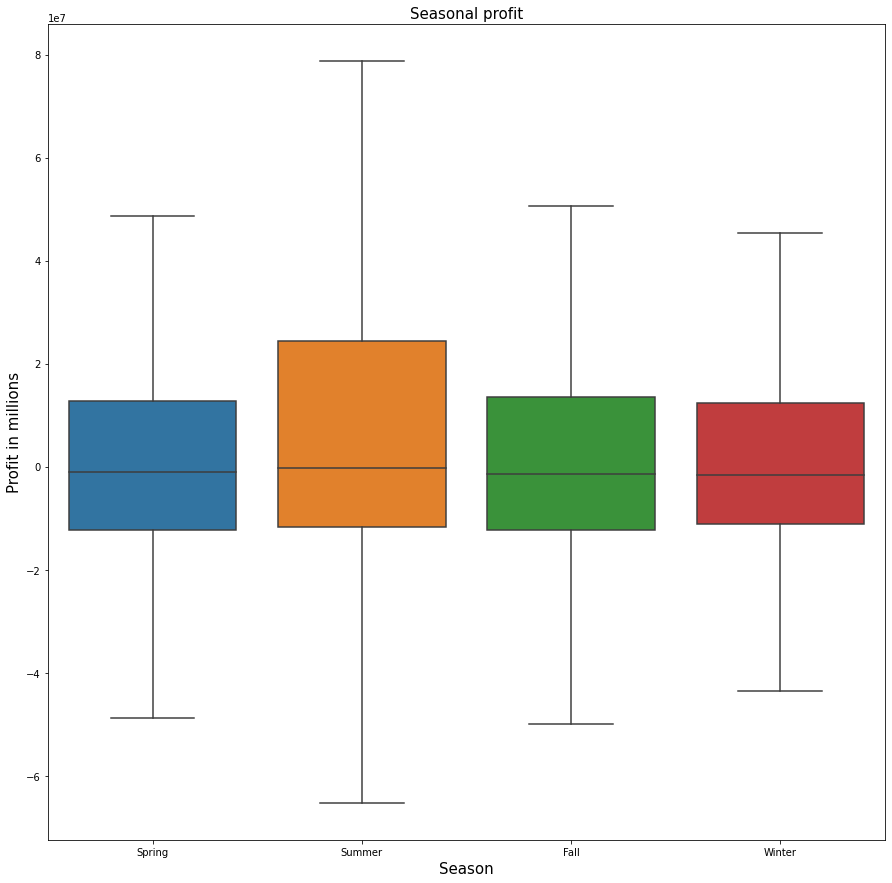

In [287]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

if not os.path.exists('images'):
    os.makedirs('images')

plot_five_fig, plot_five_ax = plt.subplots(figsize=(15,15))
sns.boxplot(x='Season', y='profit', data=tnmovies_budget, ax=plot_five_ax, showfliers=False, order=order_list)
plot_five_ax.set_xlabel('Season', fontsize = 15)
plot_five_ax.set_ylabel('Profit in millions', fontsize = 15)
plot_five_ax.set_title('Seasonal profit', fontsize = 15)


plt.savefig('images/seasonalprofits.png')

In [288]:
#Summer has the largest range which indicates a high risk of whether or not the profits will be great or negative

Find the mean for profit, budget, and gross

In [289]:
profit_mean = tnmovies_budget.profit.mean()
profit_mean

9372304.52238806

In [290]:
budget_mean = tnmovies_budget.production_budget.mean()
budget_mean

39360287.20682303

In [291]:
gross_mean = tnmovies_budget.domestic_gross.mean()
gross_mean

48732591.729211085

In [292]:
import pandas as pd

# Convert the 'release_date' column to datetime format
tnmovies_budget['release_date'] = pd.to_datetime(tnmovies_budget['release_date'])
# Extract the year from 'release_date' and create a new column 'release_year'
tnmovies_budget['release_year'] = tnmovies_budget['release_date'].dt.year.astype(int)

# Group by 'release_date' and calculate the mean, then reset the index
budget_groups = tnmovies_budget.groupby('release_date').mean().reset_index()

# Filter the DataFrame to include only records with release year less than 2020
budget_groups2 = budget_groups[budget_groups['release_date'].dt.year < 2020]

# No need to convert 'release_date' to float, it's already in datetime format

# Display the resulting DataFrame
budget_groups2


,release_date,id,production_budget,domestic_gross,worldwide_gross,profit,release_year
0,2015-01-01,6.000000,2.500000e+05,0.00,0.000000e+00,-2.500000e+05,2015.0
1,2015-01-09,56.200000,1.626000e+07,28266666.40,7.889311e+07,1.200667e+07,2015.0
2,2015-01-13,75.000000,3.125000e+06,0.00,0.000000e+00,-3.125000e+06,2015.0
3,2015-01-16,54.250000,3.825000e+07,41836542.25,1.000813e+08,3.586542e+06,2015.0
4,2015-01-20,34.500000,6.150000e+06,0.00,2.622450e+04,-6.150000e+06,2015.0
...,...,...,...,...,...,...,...
328,2019-09-20,9.000000,4.980000e+07,0.00,0.000000e+00,-4.980000e+07,2019.0
329,2019-09-30,30.000000,2.900000e+07,0.00,0.000000e+00,-2.900000e+07,2019.0
330,2019-11-08,30.000000,5.475000e+07,0.00,0.000000e+00,-5.475000e+07,2019.0
331,2019-11-22,8.000000,5.000000e+07,0.00,0.000000e+00,-5.000000e+07,2019.0


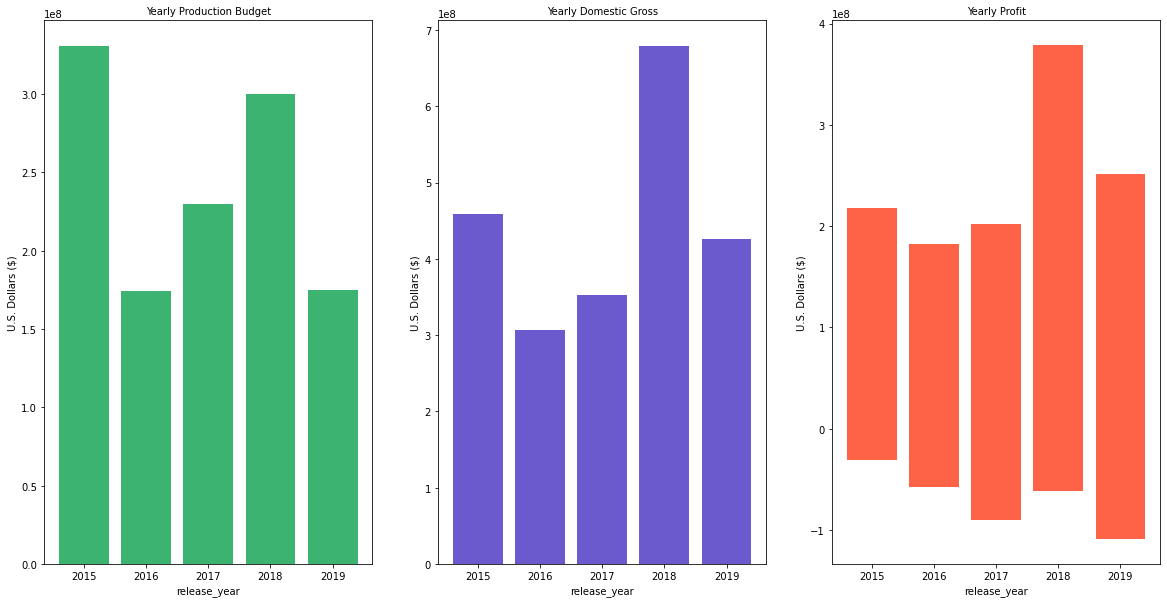

In [293]:
fig, ax = plt.subplots(figsize=(20,10), ncols=3)

ax[0].bar(budget_groups2.release_year, budget_groups2.production_budget, color='mediumseagreen')
ax[0].set_xlabel('release_year')
ax[0].set_ylabel('U.S. Dollars ($)')
ax[0].set_title('Yearly Production Budget', fontsize=10)

ax[1].bar(budget_groups2.release_year, budget_groups2.domestic_gross, color='slateblue')
ax[1].set_xlabel('release_year')
ax[1].set_ylabel('U.S. Dollars ($)')
ax[1].set_title('Yearly Domestic Gross', fontsize=10)


ax[2].bar(budget_groups2.release_year, budget_groups2.profit, color='tomato')
ax[2].set_xlabel('release_year')
ax[2].set_ylabel('U.S. Dollars ($)')
ax[2].set_title('Yearly Profit', fontsize=10);

plt.savefig('images/gross.png')

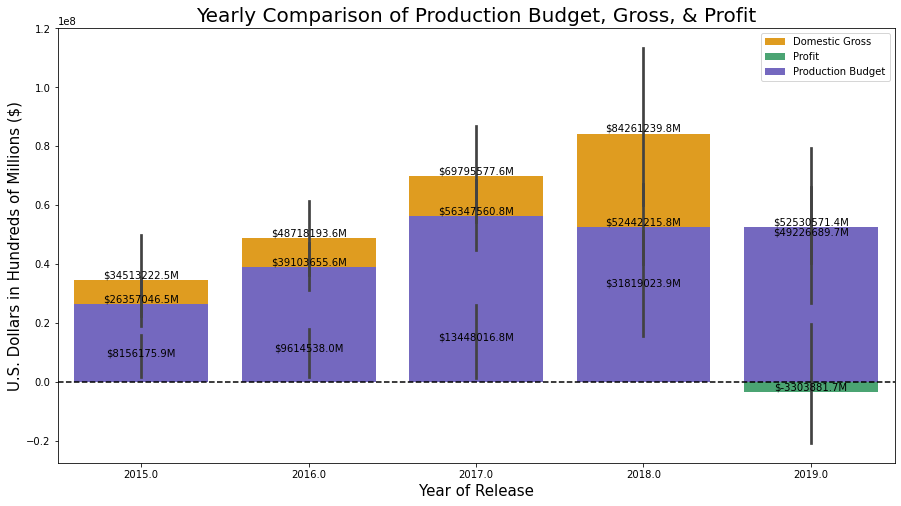

In [294]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the figure and axes
fig, ax = plt.subplots(figsize=(15, 8))

# Plot the bars with Seaborn
sns.barplot(x='release_year', y='domestic_gross', data=budget_groups2, color='orange', ax=ax, label='Domestic Gross')
sns.barplot(x='release_year', y='profit', data=budget_groups2, color='mediumseagreen', ax=ax, label='Profit')
sns.barplot(x='release_year', y='production_budget', data=budget_groups2, color='slateblue', ax=ax, label='Production Budget')

# Set the x-axis label, y-axis label, and title
ax.set_xlabel("Year of Release", fontsize=15)
ax.set_ylabel('U.S. Dollars in Hundreds of Millions ($)', fontsize=15)
ax.set_title("Yearly Comparison of Production Budget, Gross, & Profit", fontsize=20)

# Add a horizontal line
ax.axhline(y=0.5, color='black', linestyle='--')

# Add annotations to the bars
for p in ax.patches:
    ax.annotate(f"${p.get_height():.1f}M", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Show the legend
ax.legend()

# Show the plot
plt.show()

In [295]:
month_map = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,'Jul': 7,'Aug': 8, 'Sep': 9, 'Oct':10, 'Nov': 11, 'Dec':12}

In [296]:
tnmovies_budget['month_num'] = tnmovies_budget['month'].apply(lambda x: month_map.get(x))

In [297]:
sorted_budget = tnmovies_budget.sort_values('month_num')

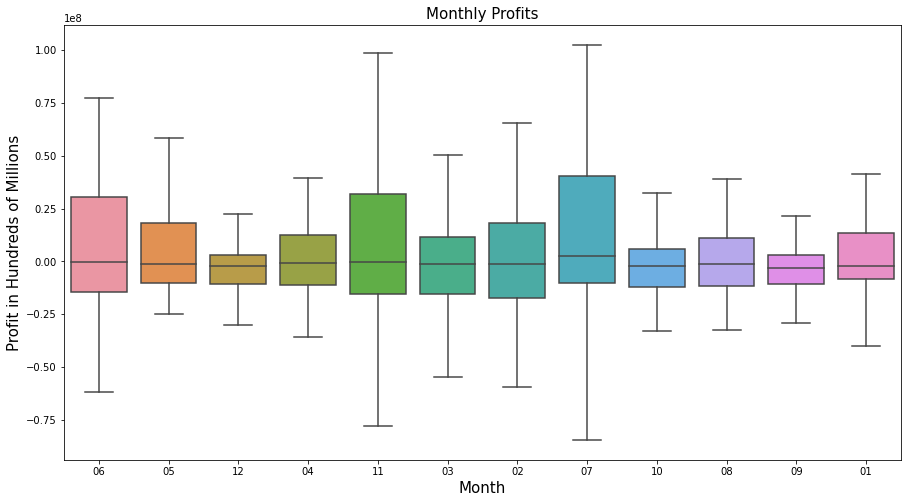

In [298]:
plot_one_fig, plot_one_ax = plt.subplots(figsize=(15,8))

sns.boxplot(x='month', y='profit', data=sorted_budget, ax=plot_one_ax, showfliers=False)
plot_one_ax.set_xlabel('Month', fontsize=15)
plot_one_ax.set_ylabel('Profit in Hundreds of Millions', fontsize=15)
plot_one_ax.set_title('Monthly Profits', fontsize=15);
plt.savefig('images/MonthlyProfitsReal.png')

Genre Analysis:

1. What are the most common genres? # Drama
2. Which genres tend to have higher ratings?
3. Are there any trends or patterns in genre popularity over time?

In [318]:
df_movie_info = pd.read_csv(r"C:\Users\bened\Documents\Moringa\Data-Science-_Content-Analysis\Data\rt.movie_info.tsv\rt.movie_info.tsv", sep='\t')
df_movie_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [319]:
df_movie_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


Data interpretation

The column values in the data include include: id , synopsis,rating ,genre, director,writer,theater_date, dvd_date, currency ,box_office , runtime, studio. From the data given we can carry out various analysis questions such as:

1. Movie genre has the highest ratings: here we can use the values from column :id,rating,genre. We can then merge it to another table to get the names of the movies.
2. The run time for the most popular movies by segmenting the top ten movies as grouped by ratings.
3. The number of movies produced by different studios such as Entertainment one studio

In [320]:
# Most common genres
common_genres = df_movie_info['genre'].value_counts().head(5)
print("Most common genres:")
print(common_genres)
print()

Most common genres:
Drama                                151
Comedy                               110
Comedy|Drama                          80
Drama|Mystery and Suspense            67
Art House and International|Drama     62
Name: genre, dtype: int64



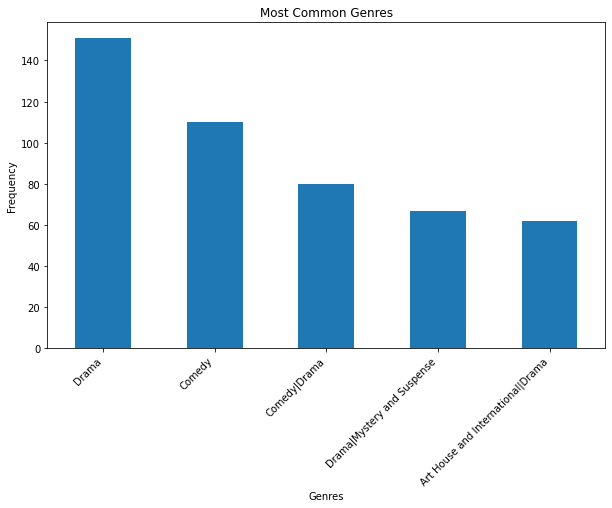

In [322]:
# Plotting histogram
plt.figure(figsize=(10, 6))
common_genres.plot(kind='bar')
plt.title('Most Common Genres')
plt.xlabel('Genres')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
What is the distribution of movie runtimes?
#find the mode runtime.
#plot a histogram to show

In [323]:
# Calculate the mode of the runtime
mode_runtime = df_movie_info['runtime'].mode()

print("Mode of the runtime:", mode_runtime)

Mode of the runtime: 0    90 minutes
dtype: object


In [324]:
# Check the frequency of the mode(s)
mode_frequency = df_movie_info['runtime'].value_counts().loc[mode_runtime]
print("Frequency of the mode runtime(s):")
print(mode_frequency)

Frequency of the mode runtime(s):
90 minutes    72
Name: runtime, dtype: int64


In [331]:
tmdbmovies_budget=pd.read_csv(r"C:\Users\bened\Documents\Moringa\Data-Science-_Content-Analysis\Data\tmdb.movies.csv\tmdb.movies.csv")

In [333]:
tmdbmovies_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


This data frame has 26517 rows and 9 columns. The columns contain values of: genre_ids,id, original_language, original_title, popularity, release_date, title, vote_average, vote_count . The type of analysis that can be done on this data includes:

1. Which movies are most popular.
2. Do a correlation analysis between original language and popularity.
3. Do a correlation between popularity and vote average.

In [335]:
# Sort the DataFrame based on 'popularity' column in descending order
sorted_movies = tmdbmovies_budget.sort_values(by='popularity', ascending=False)

# Select the top 10 rows from the sorted DataFrame
top_10_popular_movies = sorted_movies.head(10)

# Print the result
print("Most Popular Movies:")
print(top_10_popular_movies[['title', 'popularity']])

Most Popular Movies:
                                             title  popularity
23811                       Avengers: Infinity War      80.773
11019                                    John Wick      78.123
23812            Spider-Man: Into the Spider-Verse      60.534
11020    The Hobbit: The Battle of the Five Armies      53.783
5179                                  The Avengers      50.289
11021                      Guardians of the Galaxy      49.606
20617                            Blade Runner 2049      48.571
23813                            Blade Runner 2049      48.571
23814  Fantastic Beasts: The Crimes of Grindelwald      48.508
23815                    Ralph Breaks the Internet      48.057


In [340]:
from sklearn.preprocessing import LabelEncoder

# Step 1: Encode the 'original_language' column into numerical categories
label_encoder = LabelEncoder()
tmdbmovies_budget['language_code'] = label_encoder.fit_transform(tmdbmovies_budget['original_language'])

# Step 2: Access the encoded 'language_code' column and 'popularity' column
language_code = tmdbmovies_budget['language_code']
popularity = tmdbmovies_budget['popularity']

# Step 3: Calculate the correlation
correlation_language_popularity = language_code.corr(popularity)

# Step 4: Print the correlation value
print("Correlation between Original Language and Popularity:", correlation_language_popularity)

Correlation between Original Language and Popularity: 0.01036989317649995


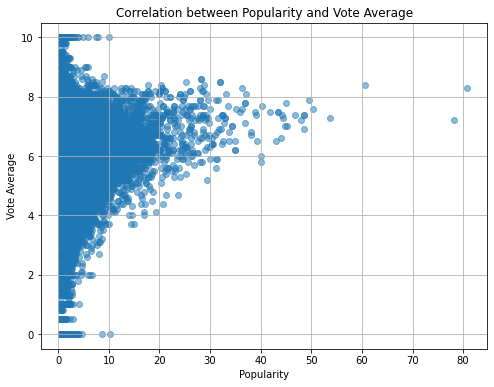

In [338]:
# Create Scatter Plot
plt.figure(figsize=(8, 6))
plt.scatter(tmdbmovies_budget['popularity'], tmdbmovies_budget['vote_average'], alpha=0.5)
plt.title('Correlation between Popularity and Vote Average')
plt.xlabel('Popularity')
plt.ylabel('Vote Average')
plt.grid(True)
plt.show()